In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Import Monthly Gas Prices from EIA
- try 1990-2026 to see if spikes happen every ten yrs

In [2]:
API_KEY = "JB0mjBHe8ebPVRafXPnetbaoNGigyEQTrYU3aoe3"
URL = "https://api.eia.gov/v2/petroleum/pri/gnd/data/"

# Define parameters for Monthly Retail Gasoline Prices
params_monthly = {
    "api_key": API_KEY,
    "frequency": "monthly", # Switched from 'weekly' to 'monthly'
    "data[]": "value",
    "facets[series][]": "EMM_EPMR_PTE_NUS_DPG", 
    "start": "1990-08-01",
    "end": "2026-01-31",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

response = requests.get(URL, params=params_monthly)
data = response.json()

# 3. DATAFRAME PROCESSING
gas_prices_monthly = pd.DataFrame(data['response']['data'])

# EIA Monthly data returns period as 'YYYY-MM'
gas_prices_monthly['Date'] = pd.to_datetime(gas_prices_monthly['period'])
gas_prices_monthly = gas_prices_monthly[['Date', 'value']].rename(columns={'value': 'Monthly_Gas_Price'})

# Sort and clean
gas_prices_monthly = gas_prices_monthly.sort_values('Date').set_index('Date')
gas_prices_monthly['Monthly_Gas_Price'] = pd.to_numeric(gas_prices_monthly['Monthly_Gas_Price'], errors='coerce')

print(gas_prices_monthly.head())

            Monthly_Gas_Price
Date                         
1990-08-01                NaN
1990-09-01              1.258
1990-10-01              1.335
1990-11-01              1.324
1990-12-01                NaN


Plot

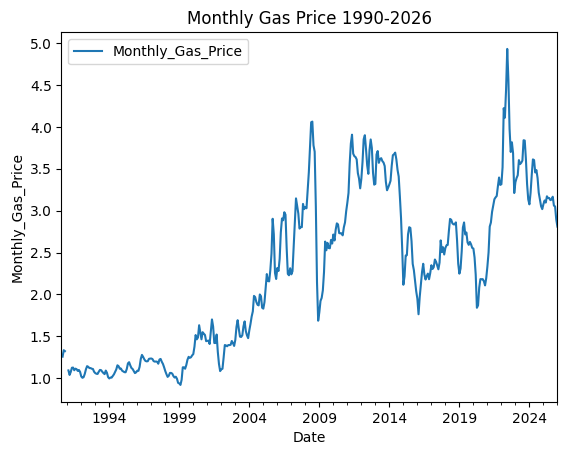

In [3]:
gas_prices_monthly.plot(kind='line', title='Monthly Gas Price 1990-2026')
plt.xlabel('Date')
plt.ylabel('Monthly_Gas_Price')
plt.show()